### Dados dos Geradores

Sistema IEEE com 30 barras e 6 geradores parâmetros: https://rwl.github.io/PYPOWER/api/pypower.case30-pysrc.html

In [2]:
from pypower.api import case30, ppoption, runpf, printpf
import numpy as np

# utiliza o sistema IEEE de 30 barras e 6 geradores
ppc = case30()
ppopt = ppoption(PF_ALG=1)
r = runpf(ppc, ppopt)

# calcula o somatório de potência dos geradores
potencia = 0
for i in range(0, len(r[0]['gen'][:])):
    potencia += r[0]['gen'][i][1]

# calcula o somatório da demanda das cargas
demanda = 0
for i in range(0, len(r[0]['bus'])):
    demanda += r[0]['bus'][i][2]

# calcula a potência que sai da barra e que entra na barra i
pot_from_bus = 0
pot_to_bus = 0
for i in r[0]['branch'][:]:
    pot_from_bus += i[13]
    pot_to_bus += i[15]


PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 3 iterations.

Converged in 0.04 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    191.6             100.4
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          41     Losses (I^2 * Z)         2.44              8.99
Transformers       0     Branch 

#### Coeficientes de Emissão de COx e de Custos dos Geradores

In [3]:
import math
from mpmath import mp
mp.dps = 300

# parâmetros do gerador
gerador = [
    {
        "Cost": [10, 200, 100],
        "Emission": [4.091, -5.554, 6.490, 20E-4, 2.857]
    },
    {
        "Cost": [10, 150, 120],
        "Emission": [2.543, -6.047, 5.638, 5.0E-4, 3.333]
    },
    {
        "Cost": [20, 180, 40],
        "Emission": [4.258, -5.094, 4.586, 1.0E-6, 8.000]
    },
    {
        "Cost": [10, 100, 60],
        "Emission": [5.326, -3.550, 3.380, 2.0E-3, 1.0E-6, 1.0E-5]
    },
    {
        "Cost": [20, 180, 40],
        "Emission": [4.258, -5.094, 4.586, 1.0E-6, 8.000]
    },
    {
        "Cost": [10, 150, 100],
        "Emission": [6.131, -5.555, 5.151, 1.0E-5, 6.667]
    }
]

### IEEE 30-bus
#### Demanda de potência ativa e reatiav
| PD (MW) | QD (MVAr) |

In [4]:
bus_data = [
     [0.00, 0.00],
     [21.70, 12.70],
     [2.40, 120],
     [7.60, 1.60],
     [94.20, 19.00],
     [0.00, 0.00],
     [22.80, 10.90],
     [30.00, 30.00],
     [0.00, 0.00],
     [5.80, 2.00],
     [0.00, 0.00],
     [11.20, 7.50],
     [0.00, 0.00],
     [6.20, 1.60],
     [8.20, 2.50],
     [3.50, 1.80],
     [9.00, 5.80],
     [3.20, 0.90],
     [9.50, 3.40],
     [2.20, 0.70],
     [17.50, 11.20],
     [0.00, 0.00],
     [3.20, 1.60],
     [8.70, 6.70],
     [0.00, 0.00],
     [3.50, 2.30],
     [0.00, 0.00],
     [0.00, 0.00],
     [2.40, 0.90],
     [10.60, 1.90]
]

### IEEE 30-bus 
#### Dados das barras e linhas
| Line | From Bus | To Bus | Resistance | Reactance | Susceptance | Rating (MVA) |

In [5]:
line_data = [
     [ 1,  2, 0.0192, 0.0575, 0.0264, 130],
     [ 1,  3, 0.0452, 0.1852, 0.0204, 130],
     [ 2,  4, 0.0570, 0.1737, 0.0184,  65],
     [ 3,  4, 0.0132, 0.0379, 0.0042, 130],
     [ 2,  5, 0.0472, 0.1983, 0.0209, 130],
     [ 2,  6, 0.0581, 0.1763, 0.0187,  65],
     [ 4,  6, 0.0119, 0.0414, 0.0045,  90],
     [ 5,  7, 0.0460, 0.1160, 0.0102,  70],
     [ 6,  7, 0.0267, 0.0820, 0.0085, 130],
     [ 6,  8, 0.0120, 0.0420, 0.0045,  32],
     [ 6,  9, 0.0000, 0.2080, 0.0000,  65],
     [ 6, 10, 0.0000, 0.5560, 0.0000,  32],
     [ 9, 11, 0.0000, 0.2080, 0.0000,  65],
     [ 9, 10, 0.0000, 0.1100, 0.0000,  65],
     [ 4, 12, 0.0000, 0.2560, 0.0000,  65],
     [12, 13, 0.0000, 0.1400, 0.0000,  65],
     [12, 14, 0.1231, 0.2559, 0.0000,  32],
     [12, 15, 0.0662, 0.1304, 0.0000,  32],
     [12, 16, 0.0945, 0.1987, 0.0000,  32],
     [14, 15, 0.2210, 0.1997, 0.0000,  16],
     [16, 17, 0.0824, 0.1923, 0.0000,  16],
     [15, 18, 0.1070, 0.2185, 0.0000,  16],
     [18, 19, 0.0639, 0.1292, 0.0000,  16],
     [19, 20, 0.0340, 0.0680, 0.0000,  32],
     [10, 20, 0.0936, 0.2090, 0.0000,  32],
     [10, 17, 0.0324, 0.0845, 0.0000,  32],
     [10, 21, 0.0348, 0.0749, 0.0000,  32],
     [10, 22, 0.0727, 0.1499, 0.0000,  32],
     [21, 22, 0.0116, 0.0236, 0.0000,  32],
     [15, 23, 0.1000, 0.2020, 0.0000,  16],
     [22, 24, 0.1150, 0.1790, 0.0000,  16],
     [23, 24, 0.1320, 0.2700, 0.0000,  16],
     [24, 25, 0.1885, 0.3292, 0.0000,  16],
     [25, 26, 0.2544, 0.3800, 0.0000,  16],
     [25, 27, 0.1093, 0.2087, 0.0000,  16],
     [28, 27, 0.0000, 0.3960, 0.0000,  65],
     [27, 29, 0.2198, 0.4153, 0.0000,  16],
     [27, 30, 0.3202, 0.6027, 0.0000,  16],
     [29, 30, 0.2399, 0.4533, 0.0000,  16],
     [ 8, 28, 0.0636, 0.2000, 0.0214,  32],
     [ 6, 28, 0.0169, 0.0599, 0.0065,  32]
]

# EEP Problem

### ------------------------------------------------------------------------------------
## Problema proposto no livro "Intelligent Systems"
##### Autores: Christine L. Mumford e Lakhmi C. Jain
### ------------------------------------------------------------------------------------
## Objetivos do Problema

#### Minimizar o Custo do Combustível: $F(P_{G})=\sum_{i=1}^{N}a_{i}+b_{i}P_{G_{i}}+c_{i}P_{G_{i}}^{2}$
O vetor da energia ativa dos geradores é definida da seguinte forma: $P_{G}= \left [ P_{G_{1}}, P_{G_{2}}, ..., P_{G_{N}}  \right ]$
#### Minimizar a Emissão de SO$_{x}$: $E(P_{G}) = \sum_{i=1}^{N}10^{-2}\left ( \alpha_{i}+\beta _{i}P_{G_{i}}+\gamma_{i}P_{G{i}}^{2} \right )+\zeta_{i}e^{\lambda_{i}P_{G_{i}}}$

Onde: $\alpha_{i}$, $\beta_{i}$, $\gamma_{i}$, $\zeta_{i}$ e $\lambda_{i}$ são coeficientes das características de emissão do gerador $i^{th}$


## Restrições do Problema

#### Restrição de Capacidade de Geração: $P_{G_{i}}^{min}\leq P_{G_{i}}\leq P_{G_{i}}^{max}, i=1, ..., N$

#### Restrições de Balanço de Energia: $\sum_{i=1}^{N}P_{G_{i}}-P_{D}-P_{loss}=0$


#### Sendo que, $P_{loss}$ é calculada da seguinte forma: $P_{loss}=\sum_{k=1}^{NL}g_{k}\left [ V_{i}^{2} + V_{j}^{2}-2V_{i}V_{j}cos(\delta_{i} - \delta_{j}) \right ]$

Onde: $NL$ é o número da linha de transmissão; $g_{k}$ é a condutância da linha $k^{th}$ conectada entre a barra $i$ para a barra $j$



In [6]:
# importa bibliotecas do Platypus (Framework de computação evolucionária multiobjetivo em Python)
from platypus import NSGAII, Problem, Real

# Definição da classe otimizacao
class otimizacao(Problem):

    def __init__(self):
        
        # init (6 variaveis, 2 objetivos, 13 restrições)
        super(otimizacao, self).__init__(6, 2, 13)
        
        # definição dos limites de cada uma das variáveis (são 6 variáveis)
        self.types[:] = [Real(0, 10000), Real(0, 10000), Real(0, 10000), Real(0, 10000), Real(0, 10000), Real(0, 10000)]
        
        # primeira restrição de igualdade
        self.constraints[0:6] = ">=0"
        
        # segunda, terça e quarta restrições definidas como inequações (maior ou igual a zero)
        self.constraints[6:12] = "<=0"
        
        # demais restrições como inequações (menor ou igual a zero)
        self.constraints[12] = "==0"
        

    # função para calcular o problema de otimização multiobjetivo
    def evaluate(self, solution):
        
        # P[1:6] são 6 variáveis do problema
        P = solution.variables[:]
        
        # calcula o somatório dos 2 objetivos do problema
        min_custo_combustivel = 0
        min_emissao = 0
        for i in range(0, len(gerador)):
            min_custo_combustivel += gerador[i]['Cost'][0] + gerador[i]['Cost'][1] * P[i] + gerador[i]['Cost'][2] * P[i] ** 2
            min_emissao += gerador[i]['Emission'][0] + gerador[i]['Emission'][1] * P[i] + gerador[i]['Emission'][2] * P[i] ** 2 + gerador[i]['Emission'][3] * mp.exp(gerador[i]['Emission'][4] * P[i])
               
        # definição da funções multiobjetivo
        solution.objectives[:] = [ min_custo_combustivel, min_emissao]
  
        # definição das restrições
        solution.constraints[:] = [P[0], P[1], P[2] -50, P[3] -55 , P[4], P[5], P[0] - 80, P[1] - 80, P[2] -1, P[3] -1, P[4] -30, P[5] -40, potencia - demanda - (pot_from_bus + pot_to_bus)]

# utiliza o algoritmo NSGAII para otimizar o problema        
algorithm = NSGAII(otimizacao())

# otimiza o problema usando 1000 funções de avaliação
funcoes_de_avaliacao = 15000
algorithm.run(funcoes_de_avaliacao)

# conclui o processo
print("Processo finalizado.")

Processo finalizado.


## Define uma tela para imprimir os resultados

In [7]:
print("Resultado da computacao evolucionaria multiobjetivo em Python")
print("\n")
print(f"Numero de funcoes de avaliacao: {funcoes_de_avaliacao}")
print("\n")
print("=================================================================================")
print("|\t\t\t\tSumario \t\t\t\t\t|")
print("---------------------------------------------------------------------------------")
print("\t Funcao Objetivo 1 \t\t\t Funcao Objetivo 2")
print("---------------------------------------------------------------------------------")

for solution in algorithm.result:
    # imprime o resultado da função multiobjetivo
    print('\t %.4f'%(solution.objectives[0]), '\t\t\t\t %.4f'%(solution.objectives[1]))

print("---------------------------------------------------------------------------------")    
print("|\t\t\t\tCusto dos Geradores \t\t\t\t|")
print("---------------------------------------------------------------------------------")
print("| \tP1", "    |", " P2", "     |", " P3", "     |", " P4", "     |", " P5", "     |", " P6\t\t|")
print("---------------------------------------------------------------------------------")
for solution in algorithm.result:
    # imprime o resultado das variáveis
    print('\t%.4f'%(solution.variables[0]), '   %.4f'%(solution.variables[1]), '    %.4f'%(solution.variables[2]), '    %.4f'%(solution.variables[3]), '    %.4f'%(solution.variables[4]), '    %.4f'%(solution.variables[5]))

Resultado da computacao evolucionaria multiobjetivo em Python


Numero de funcoes de avaliacao: 15000


|				Sumario 					|
---------------------------------------------------------------------------------
	 Funcao Objetivo 1 			 Funcao Objetivo 2
---------------------------------------------------------------------------------
	 727.4162 				 21.7619
	 472.0861 				 26.0592
	 688.7078 				 22.1868
	 705.7262 				 22.1229
	 649.2786 				 22.3423
	 665.8911 				 22.2509
	 670.9495 				 22.2204
	 720.5577 				 22.0499
	 615.2301 				 22.8040
	 598.0646 				 22.9846
	 637.5923 				 22.6660
	 602.1284 				 22.9015
	 718.7369 				 22.1180
	 589.4271 				 23.0911
	 648.5875 				 22.4712
	 519.2641 				 24.5672
	 645.2394 				 22.5667
	 617.1185 				 22.7713
	 487.3428 				 25.4835
	 626.9772 				 22.7622
	 565.4995 				 23.5430
	 517.3589 				 24.6920
	 512.7111 				 24.7965
	 484.9276 				 25.5741
	 515.0436 				 24.7010
	 535.3318 				 24.1891
	 491.9872 				 25.3430
	 571.1193 				 23.498

### Plota o Gráfico de Pareto

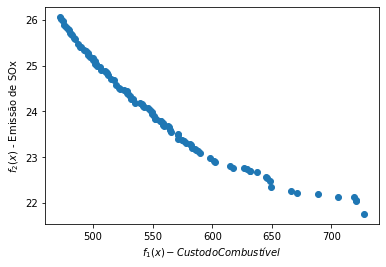

In [8]:
# plot the results using matplotlib
import matplotlib.pyplot as plt

plt.scatter([solution.objectives[0] for solution in algorithm.result],
            [solution.objectives[1] for solution in algorithm.result])
#plt.xlim([600, 640])
#plt.ylim([0.10, 0.40])
plt.xlabel("$f_1(x) - Custo do Combustível$")
plt.ylabel("$f_2(x)$ - Emissão de SOx")
plt.show()